In [84]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel("C:\\SPIT_Memoirs\\HP SOLVE 2023\\31 May 2023_data_result.xlsx")

# Create a new column called `has_review`
df['has_review'] = df['reviews'].notnull()

# Filter the DataFrame to only include rows where `has_review` is True
df = df[df['has_review']]
# Print the first five rows of the DataFrame
print(df.head())

                                        product_name    price  \
0  HP 15s, Intel Core i3-1115G4, 15.6 inch(39.6cm...  38990.0   
1  HP 14s Laptop 11th Gen Intel Core i3-1115G4 14...  39999.0   
3  HP 14s, 11th Gen Intel Core i3-1115G4 14 inch(...  43990.0   
5  HP 15s, Intel Core i3-1115G4, 15.6 inch(39.6cm...  41990.0   
9  HP Pavilion 14, 11Th Gen Intel Core I7-16Gb Ra...  83680.0   

                                     appreciated_for  \
0  good performance\r\noffice use\r\nlaptop for s...   
1  good performance\r\noffice use\r\nlaptop for s...   
3  good performance\r\noffice use\r\nlaptop for s...   
5                                                NaN   
9  good performance\r\noffice use\r\nlaptop for s...   

                                              rating  \
0  4.0 4.0 out of 5 stars\r\n22 ratings\r\n4.0 ou...   
1  3.5 3.5 out of 5 stars\r\n3 ratings\r\n3.5 out...   
3  3.8 3.8 out of 5 stars\r\n9 ratings\r\n3.8 out...   
5  2.9 2.9 out of 5 stars\r\n5 ratings\r\n2.9 ou

In [85]:
import pandas as pd


df['rating_number'] = df['rating'].apply(lambda x: re.search("[+-]?\d+\.\d+", x).group())

# Extract the rank in ranking(electronics)
df["ranking(electronics)"] = df["ranking(electronics)"].str.extract("(\d+)")

# Extract the rank in ranking(laptops)
df["ranking(laptops)"] = df["ranking(laptops)"].str.extract("(\d+)")

In [86]:
import re

# Extract the review text
def extract_review(text):
  review_start = text.find("out of 5 stars") + len("out of 5 stars")
  review_end = text.find("Reviewed in India")
  if review_start == -1 or review_end == -1:
    return ""
  return text[review_start:review_end]

# Extract the date of review
def extract_date(text):
  date_start = text.find("Reviewed in India on ")
  date_end = text.find("Verified Purchase")
  if date_start == -1 or date_end == -1:
    return ""
  return text[date_start + len("Reviewed in India on "):date_end]


# Apply the function to `df['reviews']`
df['review_text'] = df['reviews'].apply(extract_review)
df['date'] = df['reviews'].apply(extract_date)
df['reviews'] = df['reviews'].str.replace('\r', '').str.replace('\n', '')

# Print the first few rows of the DataFrame
print(df.head())

                                        product_name    price  \
0  HP 15s, Intel Core i3-1115G4, 15.6 inch(39.6cm...  38990.0   
1  HP 14s Laptop 11th Gen Intel Core i3-1115G4 14...  39999.0   
3  HP 14s, 11th Gen Intel Core i3-1115G4 14 inch(...  43990.0   
5  HP 15s, Intel Core i3-1115G4, 15.6 inch(39.6cm...  41990.0   
9  HP Pavilion 14, 11Th Gen Intel Core I7-16Gb Ra...  83680.0   

                                     appreciated_for  \
0  good performance\r\noffice use\r\nlaptop for s...   
1  good performance\r\noffice use\r\nlaptop for s...   
3  good performance\r\noffice use\r\nlaptop for s...   
5                                                NaN   
9  good performance\r\noffice use\r\nlaptop for s...   

                                              rating ranking(electronics)  \
0  4.0 4.0 out of 5 stars\r\n22 ratings\r\n4.0 ou...                    1   
1  3.5 3.5 out of 5 stars\r\n3 ratings\r\n3.5 out...                    2   
3  3.8 3.8 out of 5 stars\r\n9 ratings\r\

# Sentiment Analysis

In [87]:
df.reset_index(drop=True, inplace=True)
# Create a new column called "sentiment".
df["sentiment"] = ""
df.sort_index(inplace=True)
# Loop through the reviews column and categorize each review as complaint or appreciation.
for i in range(len(df)):
  review = df["reviews"][i]

  # If the review contains any of the following words, categorize it as a complaint.
  complaint_words = ["bad", "poor", "terrible", "awful", "disappointed"]
  if any(word in review for word in complaint_words):
    df["sentiment"][i] = "complaint"

  # Otherwise, categorize it as appreciation.
  else:
    df["sentiment"][i] = "appreciation"

# Print the first few rows of the DataFrame.
print(df.head())

                                        product_name    price  \
0  HP 15s, Intel Core i3-1115G4, 15.6 inch(39.6cm...  38990.0   
1  HP 14s Laptop 11th Gen Intel Core i3-1115G4 14...  39999.0   
2  HP 14s, 11th Gen Intel Core i3-1115G4 14 inch(...  43990.0   
3  HP 15s, Intel Core i3-1115G4, 15.6 inch(39.6cm...  41990.0   
4  HP Pavilion 14, 11Th Gen Intel Core I7-16Gb Ra...  83680.0   

                                     appreciated_for  \
0  good performance\r\noffice use\r\nlaptop for s...   
1  good performance\r\noffice use\r\nlaptop for s...   
2  good performance\r\noffice use\r\nlaptop for s...   
3                                                NaN   
4  good performance\r\noffice use\r\nlaptop for s...   

                                              rating ranking(electronics)  \
0  4.0 4.0 out of 5 stars\r\n22 ratings\r\n4.0 ou...                    1   
1  3.5 3.5 out of 5 stars\r\n3 ratings\r\n3.5 out...                    2   
2  3.8 3.8 out of 5 stars\r\n9 ratings\r\

<ipython-input-87-753343aac5ed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"][i] = "appreciation"
<ipython-input-87-753343aac5ed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"][i] = "complaint"


In [80]:
excel_file_name = "cleaned_final.xlsx"


# Call to_excel() function with the file name to export the DataFrame
df.to_excel(excel_file_name)

In [111]:
import pandas as pd
import networkx as nx

# Change the column names
df.columns = ["SR.no","name", "price", "appreciated_for", "rating", "ranking(electronics)", "ranking(laptops)", "reviews", "has_review", "rating_number", "review_text", "date", "sentiment"]

# Extract the product name, price, appreciated_for, rating, ranking(electronics), ranking(laptops), has_review, review, date, and review_text columns from the DataFrame.
product_name = df["name"]
price = df["price"]
appreciated_for = df["appreciated_for"]
ranking_electronics = df["ranking(electronics)"]
ranking_laptops = df["ranking(laptops)"]
rating = df["rating_number"]
review_text = df["review_text"]
date = df["date"]
sentiment = df["sentiment"]


# Create a knowledge graph using the extracted data.
g = nx.Graph()

# Add nodes to the knowledge graph.
for i in range(len(df)):
  g.add_node(product_name[i])

# Add edges to the knowledge graph.
for i in range(len(df)):
  g.add_edge(product_name[i], appreciated_for[i])
  g.add_edge(product_name[i], rating[i])
  g.add_edge(product_name[i], ranking_electronics[i])
  g.add_edge(product_name[i], ranking_laptops[i])
  g.add_edge(product_name[i], has_review[i])
  g.add_edge(product_name[i], review[i])
  g.add_edge(product_name[i], date[i])
  g.add_edge(product_name[i], review_text[i])

# Create a dictionary of relations.
relations = {
    "product_name":"Name",
    "price":"price",
    "appreciated_for": "is appreciated for",
  "rating": "has a rating of",
  "ranking_electronics": "is ranked # in electronics",
  "ranking_laptops": "is ranked # in laptops",
  "review_text": "is reviewed as",
  "date": "was reviewed on",
  "sentiment": "sentiment"
}

# Add the relations to the knowledge graph.
for relation, label in relations.items():
  for node1, node2 in g.edges():
    g.add_edge(node1, node2, relation=label)

# Save the knowledge graph to a file.
nx.write_graphml(g, "knowledge_graph.graphml")

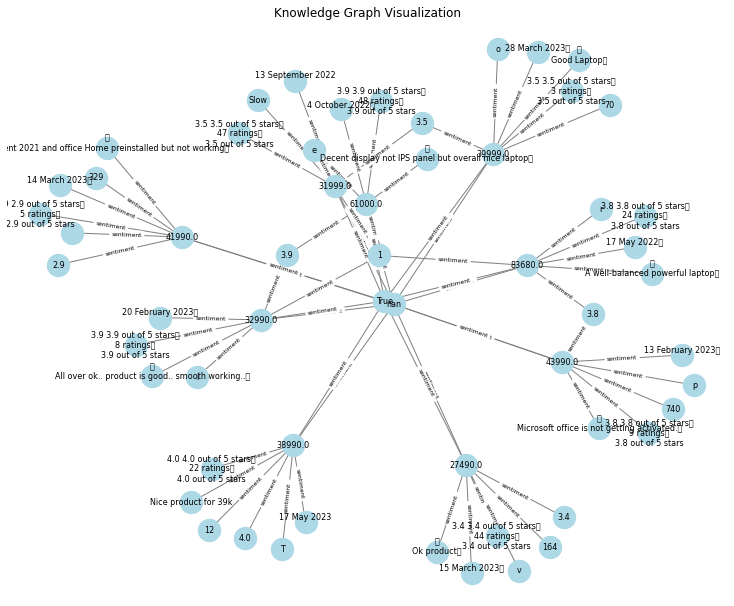

In [112]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the knowledge graph from the graphml file
g = nx.read_graphml("knowledge_graph.graphml")

# Visualize the knowledge graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g, seed=42)
nx.draw(g, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, edge_color='gray')
edge_labels = nx.get_edge_attributes(g, 'relation')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_size=6)
plt.title("Knowledge Graph Visualization")
plt.show()
